<br>
<div align="center"><font size=2> eScience course 2022</font></div>
<br>
<br>
<div align="center"><font size=10><b>Effects of increasing precipitation on aerosol concentration in the Arctic</b></font></div>
<div align="center"><font size=6>Ingrid Lundhaug</font></div>
<div align="center"><font size=4>ingrblu@uio.no</font></div>
<div align="center"><font size=3><b>Assistant: Theodore Khadir</b></font></div>
<br>
<div align="center"><font size=3>18.11.22</font></div>
<br>
<br>
<br>
<br>




## Abstract 

In this study, the influence of increased precipitation in a warmer climate on aerosol concentration is investigated. Due to the rapid warming in the Arctic, pronounced precipitation is expected. This study uses a CMIP6 model to get a better understanding of how enhanced precipitation in an abrupt 4xCO2 experiment affects aerosol concentration in the Arctic. A lack of CCN particles is present in areas over the sea where precipitation is enhanced. Over land, the relation between precipitation and CCNs is not as pronounced.   


## Table of Contents
1. [Introduction](#intro)
1. [Methods](#methods)
    1. [Packages](#packages)
    1. [Datasets](#dataset)
    1. [Analysis methods](#methodology)
1. [Results and discussion](#results)
1. [Conclusion](#conclusion)
1. [Outlook](#outlook)
1. [References](#references)
1. [Acknowledgments](#Acknowledgments)


## 1. Introduction <a name="intro"></a>

The warming in the Artic is growing at much higher rates than the rest of the world - a phenomenon known as Artic amplification (Previdi et al., 2021). With increasing temperatures, the atmosphere can hold on more moisture, and thus increasing precipitation is expected. In addition, the massive sea ice retreat increases surface evaporation, which makes the Artic precipitation much more pronounced than what it would be only due to the Arctic warming (Bintanja et al., 2020). 

Droplets and ice crystals in clouds together with precipitation can alter the aerosol particle concentration, by acting as sources and sinks. Wet scavenging is one of the most important sinks of aerosol particles in the atmosphere. Particles that are activated to cloud droplets or crystals can grow large enough under the right conditions to fall out of the cloud as precipitation. the particles are then scavenged by in-cloud scavenging, which is a major removal process for the accumulation mode. Aerosol particles can also be scavenged from beneath the cloud (below-cloud scavenging). This occurs when the cloud above is precipitating, and particles get collected and removed by the falling droplets. Below-cloud scavenging is an important sink for particles in the nucleation mode and coarser particles. (Isokääntä, 2022)

Aerosols have a crucial impact on the earth's energy budget. Aerosols alter the energy budget directly by scattering and absorbing solar and infrared radiation. In addition, aerosols also have an indirect effect where they can work as cloud condensation nuclei (CCN), thus altering the clouds properties such as lifetime and albedo. With an increased amount of CCN, the particles grow to be smaller which increases the lifetime and albedo of the cloud. Hence inducing a negative effect on the radiative balance.

Further knowledge of how a warmer Arctic climate with increasing precipitation affects the aerosol concentration is thus important to get a better understanding their magnitude in the energy budged. 

## 2. Methods <a name="methods"></a>

### 2.A. Packages <a name="packages"></a>



In [33]:
# Importing packages
import os as os

# for handling the data
import xarray as xr
xr.set_options(display_style='html')
import intake
import cftime
import pandas as pd
import dask
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# for plotting 
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy as cy
import matplotlib.gridspec as gridspec
%matplotlib inline

# my functions
from functions_Ingrid import *
%reload_ext autoreload
%autoreload 2

# ignoring warnings 
import warnings
warnings.filterwarnings('ignore')


### 2.B. Datasets <a name="datasets"></a>

<b>Model, experiments, and variables</b> \
I used a coupled Earth System Model from CMIP6; The Norwegian Earth System Model version 2 (NorESM2) which is developed by the NorESM Climate modeling Consortium (NCC). There are three version of NorESM2 with different resolutions where NorESM2-MM with 1 degree resolutions is used in this project. To understand how precipitation in a warmer climate affects aerosol concentration I chose the experiments abrupt 4xCO2 and the piControl, to compare the variables without interuptions by future emissions. Hence the changes in aerosol concentration that is caused indirectly due to the increasing temperature can be investigated. The variables I focused on are Precipitation ('pr'), Cloud Condensation Nuclei Concentration at Liquid Cloud Top ('ccn'), and Surface Temperature ('ts'). 

<b>Reading the data</b> \
Since the aerosols variables was not available at the Pangeo CMIP6 online catalog, I downloaded the data directly from esgf with wget for the 30 first years (10 years at the time), for both experiments. An example of how that was done is shown below. The timeperiod was selected so that the abrupt 4xCO2 experiment could reach a steady state after the quadrupling. 



In [2]:
'''
urls = ['http://noresg.nird.sigma2.no/thredds/fileServer/esg_dataroot/cmor/CMIP6/CMIP/NCC/NorESM2-MM/abrupt-4xCO2/r1i1p1f1/Amon/pr/gn/v20191108/pr_Amon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_002101-003012.nc', 
 'http://noresg.nird.sigma2.no/thredds/fileServer/esg_dataroot/cmor/CMIP6/CMIP/NCC/NorESM2-MM/abrupt-4xCO2/r1i1p1f1/Amon/ts/gn/v20191108/ts_Amon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_002101-003012.nc', 
 'http://noresg.nird.sigma2.no/thredds/fileServer/esg_dataroot/cmor/CMIP6/CMIP/NCC/NorESM2-MM/abrupt-4xCO2/r1i1p1f1/AERmon/ccn/gn/v20191108/ccn_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_002101-003012.nc'] 


# wget all files in the list
for url in urls:
    os.system('wget ' + url)
'''

"\nurls = ['http://noresg.nird.sigma2.no/thredds/fileServer/esg_dataroot/cmor/CMIP6/CMIP/NCC/NorESM2-MM/abrupt-4xCO2/r1i1p1f1/Amon/pr/gn/v20191108/pr_Amon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_002101-003012.nc', \n 'http://noresg.nird.sigma2.no/thredds/fileServer/esg_dataroot/cmor/CMIP6/CMIP/NCC/NorESM2-MM/abrupt-4xCO2/r1i1p1f1/Amon/ts/gn/v20191108/ts_Amon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_002101-003012.nc', \n 'http://noresg.nird.sigma2.no/thredds/fileServer/esg_dataroot/cmor/CMIP6/CMIP/NCC/NorESM2-MM/abrupt-4xCO2/r1i1p1f1/AERmon/ccn/gn/v20191108/ccn_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_002101-003012.nc'] \n\n\n# wget all files in the list\nfor url in urls:\n    os.system('wget ' + url)\n"

After downlowding the data, the files was read in with xarray. Since the data was for 10 years at the time, the datasets for each 10 year period was contatenated together.  

#### Reading files from piControl for the first 30 years:

In [3]:
# Reading in multiple piControl files for the 10 first years:

list_of_files10_piControl = [
    '../../Data/ccn_AERmon_NorESM2-MM_piControl_r1i1p1f1_gn_120001-120912.nc',
    '../../Data/cdnc_AERmon_NorESM2-MM_piControl_r1i1p1f1_gn_120001-120912.nc',
    '../../Data/co2_AERmon_NorESM2-MM_piControl_r1i1p1f1_gn_120001-120912.nc',
    '../../Data/emibc_AERmon_NorESM2-MM_piControl_r1i1p1f1_gn_120001-120912.nc',
    '../../Data/emibvoc_AERmon_NorESM2-MM_piControl_r1i1p1f1_gn_120001-120912.nc',
    '../../Data/emidust_AERmon_NorESM2-MM_piControl_r1i1p1f1_gn_120001-120912.nc',
    '../../Data/emioa_AERmon_NorESM2-MM_piControl_r1i1p1f1_gn_120001-120912.nc',
    '../../Data/emiso2_AERmon_NorESM2-MM_piControl_r1i1p1f1_gn_120001-120912.nc',
    '../../Data/emiso4_AERmon_NorESM2-MM_piControl_r1i1p1f1_gn_120001-120912.nc',
    '../../Data/emiss_AERmon_NorESM2-MM_piControl_r1i1p1f1_gn_120001-120912.nc',
    '../../Data/pr_Amon_NorESM2-MM_piControl_r1i1p1f1_gn_120001-120912.nc',
    '../../Data/prc_Amon_NorESM2-MM_piControl_r1i1p1f1_gn_120001-120912.nc',
    '../../Data/ts_Amon_NorESM2-MM_piControl_r1i1p1f1_gn_120001-120912.nc',
    '../../Data/so2_AERmon_NorESM2-MM_piControl_r1i1p1f1_gn_120001-120912.nc',
    '../../Data/emivoc_AERmon_NorESM2-MM_piControl_r1i1p1f1_gn_120001-120912.nc',
    '../../Data/emiisop_AERmon_NorESM2-MM_piControl_r1i1p1f1_gn_120001-120912.nc'
]

ds_piControl10 = xr.open_mfdataset(list_of_files10_piControl, combine='by_coords', compat='override', use_cftime=True)


In [4]:
# Reading in piControl data for the next 20 years, where the files contains all variables that was read in for the 10 first years

ds_piControl20 = xr.open_mfdataset('../../Data/NorESM2-MM_piControl_r1i1p1f1_gn_121001-121912.nc', use_cftime=True)
ds_piControl30 = xr.open_mfdataset('../../Data/NorESM2-MM_piControl_r1i1p1f1_gn_122001-122912.nc', use_cftime=True)

#### Reading files from 4xco2 experiment for the first 30 years:

In [5]:
# 10 first years

ds_4xco2_10 = xr.open_mfdataset('../../Data/all_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_000101-001012.nc', use_cftime=True)

In [6]:
# next 10 years

list_of_files20 = [
    '../../Data/ccn_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_001101-002012.nc',
    '../../Data/pr_Amon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_001101-002012.nc',
    '../../Data/cdnc_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_001101-002012.nc',
    '../../Data/co2_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_001101-002012.nc',
    '../../Data/emibc_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_001101-002012.nc',
    '../../Data/emibvoc_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_001101-002012.nc',
    '../../Data/emidust_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_001101-002012.nc',
    '../../Data/emiisop_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_001101-002012.nc',
    '../../Data/emioa_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_001101-002012.nc',
    '../../Data/emiso2_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_001101-002012.nc',
    '../../Data/emiso4_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_001101-002012.nc',
    '../../Data/emiss_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_001101-002012.nc',
    '../../Data/emivoc_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_001101-002012.nc',
    '../../Data/prc_Amon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_001101-002012.nc',
    '../../Data/so2_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_001101-002012.nc',
    '../../Data/ts_Amon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_001101-002012.nc']

ds_4xco2_20 = xr.open_mfdataset(list_of_files20, combine='by_coords', compat='override', use_cftime=True)


In [7]:
# last 10 years

list_of_files30 = [
    '../../Data/ccn_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_002101-003012.nc',
    '../../Data/pr_Amon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_002101-003012.nc',
    '../../Data/cdnc_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_002101-003012.nc',
    '../../Data/co2_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_002101-003012.nc',
    '../../Data/emibc_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_002101-003012.nc',
    '../../Data/emibvoc_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_002101-003012.nc',
    '../../Data/emidust_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_002101-003012.nc',
    '../../Data/emiisop_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_002101-003012.nc',
    '../../Data/emioa_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_002101-003012.nc',
    '../../Data/emiso2_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_002101-003012.nc',
    '../../Data/emiso4_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_002101-003012.nc',
    '../../Data/emiss_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_002101-003012.nc',
    '../../Data/emivoc_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_002101-003012.nc',
    '../../Data/prc_Amon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_002101-003012.nc',
    '../../Data/so2_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_002101-003012.nc',
    '../../Data/ts_Amon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_002101-003012.nc']

ds_4xco2_30 = xr.open_mfdataset(list_of_files30, combine='by_coords', compat='override', use_cftime=True)

#### Making the datasets for each time period to have equal coordinates, and longitude range before concatenating:

#### For piControl

In [8]:
# dropping variables that dosn't exsist in all time periods 

variables = ["time_bnds", "lev_bnds", "p0", "a", "b", "ps", "a_bnds", "b_bnds", "lat_bnds", "lon_bnds"]
ds_piControl10 = ds_piControl10.drop_vars(variables)

variables = ["dms", "emidms"]
ds_piControl20 = ds_piControl20.drop_vars(variables)
ds_piControl30 = ds_piControl30.drop_vars(variables)

In [9]:
# transforming longitude range for the 10 first years

ds_piControl10 = ds_piControl10.assign_coords(lon=(((ds_piControl10.lon + 180) % 360) - 180)).sortby('lon')

#### For abrubt 4xCO2

In [10]:
# the time periods for datasets with different dimension
time20 = ds_4xco2_20.time.values
time30 = ds_4xco2_30.time.values

In [11]:
# converterting datatset for second timeperiod to have the same lat, lon and lev points as first period
ds_20 = convert(ds_4xco2_20, list_of_files20, time20)

../../Data/cdnc_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_001101-002012.nc
../../Data/co2_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_001101-002012.nc
../../Data/so2_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_001101-002012.nc


In [12]:
# converterting datatset for third timeperiod to have the same lat, lon and lev points as first period
ds_30 = convert(ds_4xco2_30, list_of_files30, time30)

../../Data/cdnc_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_002101-003012.nc
../../Data/co2_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_002101-003012.nc
../../Data/so2_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_002101-003012.nc


#### Concatenating the datasets for the three time periods for each experiment:

In [13]:
# the variables the dataset should contain
var_list = ['pr', 'ccn', 'cdnc', 'co2', 'emibc', 'emibvoc', 'emidust', 'emiisop', 'emioa', 'emiso2', 'emiso4', 'emiss', 'emivoc', 'prc', 'so2', 'ts']

In [14]:
# concatinating for abrubt 4xCO2
ds_all_4xco2 = xr.concat([ds_4xco2_10[var_list], ds_20[var_list], ds_30[var_list]], dim="time")

In [15]:
# concatinating for piControl
ds_all_piControl = xr.concat([ds_piControl10[var_list], ds_piControl20[var_list], ds_piControl30[var_list]], dim='time')

Fixing variable units:

In [16]:
ds_4xco2_NorESM = fix_units(ds_all_4xco2)
ds_piControl_NorESM = fix_units(ds_all_piControl)

### 2.C. Analysis methods <a name="methodology"></a>

In [17]:
# yearly data
ds_4xco2_NorESM_y = annual(ds_4xco2_NorESM)
ds_piControl_NorESM_y = annual(ds_piControl_NorESM)

#### Calculations for time series plots - Global and Arctic mean

In [18]:
# defining the Arctic area 
max_lat = 90; min_lat = 70; max_lon = 135; min_lon = 45

# finding all lat and lon within the area
mask_lon = (ds_4xco2_NorESM_y.lon >= min_lon) & (ds_4xco2_NorESM_y.lon <= max_lon)
mask_lat = (ds_4xco2_NorESM_y.lat >= min_lat) & (ds_4xco2_NorESM_y.lat<= max_lat)

# delimit the datatsets to only where the lat and lon are True
ds_arctic_4xco2 = ds_4xco2_NorESM_y.where(mask_lon & mask_lat, drop=True)
ds_arctic_piControl = ds_piControl_NorESM_y.where(mask_lon & mask_lat, drop=True)

In [19]:
# Artic and global mean

arctic_mean_4xco2 = weighted_mean(ds_arctic_4xco2)
global_mean_4xco2 = weighted_mean(ds_4xco2_NorESM_y)

arctic_mean_piControl = weighted_mean(ds_arctic_piControl)
global_mean_piControl = weighted_mean(ds_piControl_NorESM_y)

#### Calculations for spatial plots - difference between abrupt 4xCO2 and piControl

In [20]:
# skipping the 5 first years compare thexperiments after the quardrupling of CO2 is stabalized 

ds_4xco2_stable = ds_4xco2_NorESM_y.sel(time=slice('0005-12-31','0030-12-31'))
ds_piControl_stable = ds_piControl_NorESM_y.sel(time=slice('1204-12-31','1229-12-31'))

ds_4xco2_stable = add_attrs(ds_4xco2_stable)
ds_piControl_stable = add_attrs(ds_piControl_stable)

In [21]:
# computing the mean over time 
ds_4xco2_mean = ds_4xco2_stable.mean('time', keep_attrs=True)
ds_piControl_mean = ds_piControl_stable.mean('time', keep_attrs=True)

In [22]:
# global differences
ds_diff = ds_4xco2_mean-ds_piControl_mean

#### Seasonal differences

In [23]:
# grouping the datasets into seasons
ds_season_4xco2 = ds_4xco2_NorESM.groupby('time.season').mean(keep_attrs=True)
ds_season_piControl = ds_piControl_NorESM.groupby('time.season').mean(keep_attrs=True)

In [24]:
# gloabal seasonal differences
season_diff = ds_season_4xco2-ds_season_piControl

In [25]:
# name of seasons
seasons = season_diff.season.values

## 3. Results and discussion <a name="results"></a>

Figure 1 shows that temperature, precipitation, and CCN concentrations will increase more over the Arctic than for the global mean. Increased precipitation can cause a removal of CCN particles due to wet scavenging, but the CCN concentration is still increasing likely due to the quadrupling of CO2. 

The spatial plots in Figures 2, and 3, show that the most pronounced increase in precipitation occurs on the south coast of Greenland, as well as over the Bering Sea. If we look at the CCN concentration in Figure 3 for the same locations, we see that the concentration is only increasing slightly. Bearing in mind from figure 1 that Arctic CCN concentration will have a large increase in total, the slight increase in CCNs over the two locations could induce that wet scavenging is a dominating process.  

On the other hand, CCN concentrations are also only slightly increasing over Scandinavia and western parts of Russia, where precipitation is not pronouncedly increased. In addition, the CCNs is conspicuously decreasing over eastern parts of Russia. The precipitation map shows that there is an increase in precipitation, but not as concentrated in the same locations as the CCN drop. The precipitation is also not increasing as pronouncedly as for the coast of Greenland, and the Bering Sea. One difference between these two scenarios is that the first case is located over the ocean, and the second case is located over the continents. Over the oceans, there is more access to moisture from the sea, while this is not necessarily the case over land. Thus other processes can induce the small increase in CCNs over land, while wet scavenging over the two ocean areas can still be a part of the removal of CCNs in these regions. 

The changes in CCN concentrations strongly vary over the year as Figure 7 shows. The summer months are characterized by high concentrations of CCNs, while winter and spring have the lowest CCN concentrations. Compared with the seasonal precipitation plots in Figure 6, we see that precipitation is at its lowest in the summer months and highest in winter and spring. Hence when there is less precipitation, there would be less wet scavaging, and we see more CCN concentration. However multiple factors affect the seasonal differences in CCN concentration. In summer there is more solar radiation compared to the winter, especially in the Arctic. Higher solar radiation produces higher chemical activity, and thus also the formation of new aerosol particles. The lack of solar radiation in the spring and winter also reduces the ability for new aerosol particles to form.


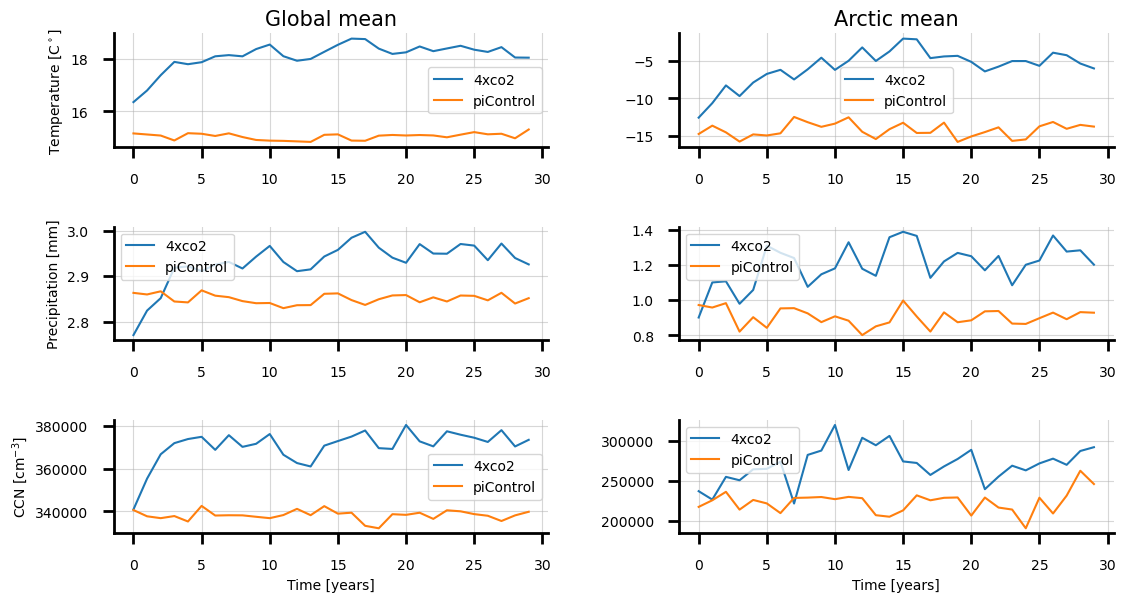

In [26]:
# Plotting time series

timepoints = []

for i in range(len(global_mean_4xco2['time'])):
    timepoints.append(i)
    

fig = plt.figure(figsize=(10, 5))

gs = gridspec.GridSpec(ncols=2, nrows=3, hspace = 0.7, wspace = 0.3, top = 1,
                       bottom = 0, left = 0, right = 1)


ax = fig.add_subplot(gs[0, 0])
ax.plot(timepoints, global_mean_4xco2['ts'], label='4xco2')
ax.plot(timepoints, global_mean_piControl['ts'], label='piControl')
ax.set_title('Global mean', size=15)
ax.set_ylabel('Temperature [C$^\circ$]')
ax.legend()
fancy(ax, 10)

ax = fig.add_subplot(gs[1, 0])
ax.plot(timepoints, global_mean_4xco2['pr'], label='4xco2')
ax.plot(timepoints, global_mean_piControl['pr'], label='piControl')
ax.set_ylabel('Precipitation [mm]')
ax.legend()
fancy(ax, 10)

ax = fig.add_subplot(gs[2, 0])
ax.plot(timepoints, global_mean_4xco2['ccn'], label='4xco2')
ax.plot(timepoints, global_mean_piControl['ccn'], label='piControl')
ax.set_xlabel('Time [years]')
ax.set_ylabel('CCN [cm$^{-3}$]')
ax.legend()
fancy(ax, 10)

ax = fig.add_subplot(gs[0, 1])
ax.plot(timepoints, arctic_mean_4xco2['ts'], label='4xco2')
ax.plot(timepoints, arctic_mean_piControl['ts'], label='piControl')
ax.set_title('Arctic mean', size=15)
ax.legend()
fancy(ax, 10)

ax = fig.add_subplot(gs[1, 1])
ax.plot(timepoints, arctic_mean_4xco2['pr'], label='4xco2')
ax.plot(timepoints, arctic_mean_piControl['pr'], label='piControl')
ax.legend()
fancy(ax, 10)

ax = fig.add_subplot(gs[2, 1])
ax.plot(timepoints, arctic_mean_4xco2['ccn'], label='4xco2')
ax.plot(timepoints, arctic_mean_piControl['ccn'], label='piControl')
ax.set_xlabel('Time [years]')
#ax.set_yscale('log')
ax.legend()
fancy(ax, 10)
    


Figure 1: timeseries plots of how temperature, precipitation, and CCN varies the 30 first year after start of runtime, for both experiments. 

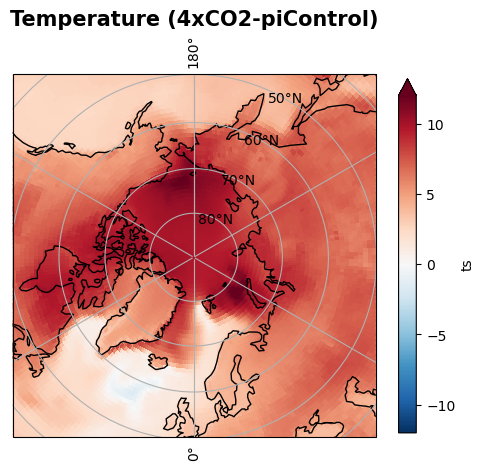

In [27]:
# plotting differences in temp, precipitation, and CCN concentration on a map

plot_map(ds_diff['ts'], 'Temperature (4xCO2-piControl)', reverse=True, vmin=-12, vmax=12)

Figure 2: Spatial plot for tempereature changes for the abrupt 4xCO2-piControl experiment over the Artic area. Units are given in C$^\circ$.

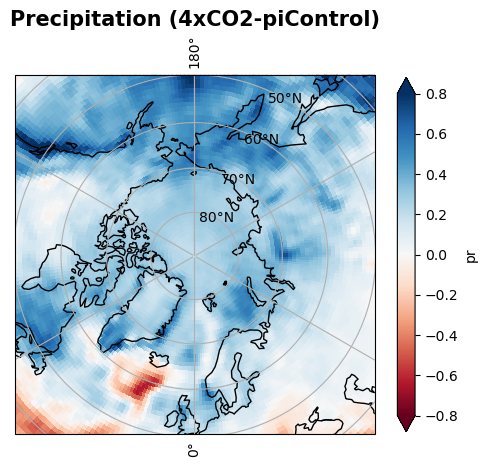

In [28]:
plot_map(ds_diff['pr'], 'Precipitation (4xCO2-piControl)', vmin=-0.8, vmax=0.8)

Figure 3: Spaceial plot for precipitation changes for the abrupt 4xCO2-piControl experiment over the Artic area. Units are given in $mm$.

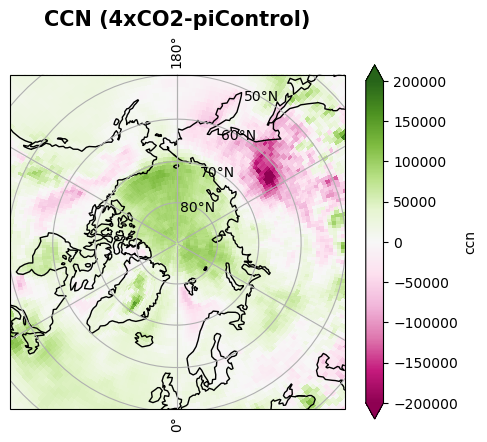

In [29]:
plot_map(ds_diff['ccn'], 'CCN (4xCO2-piControl)', cmap='PiYG',  vmin=-200000, vmax=200000)

Figure 4: Spaceial plot for changes in ccn concentration for the abrupt 4xCO2-piControl experiment over the Artic area. Units are given in $cm^{-3}$.

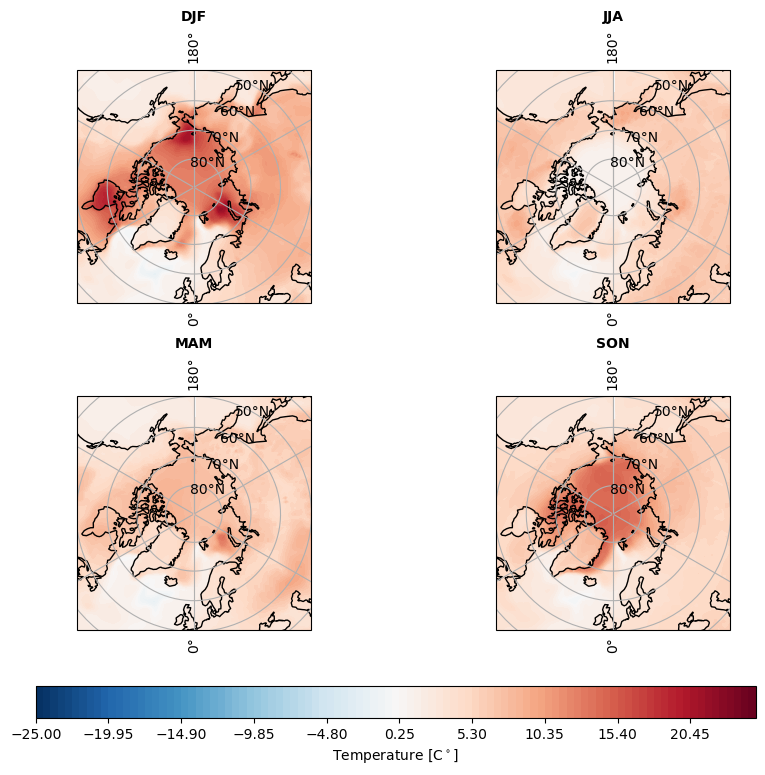

In [30]:
plot_seasons_map(season_diff, 'ts', seasons, 'Temperature [C$^\circ$]', np.linspace(-25,25,100), cmap='RdBu_r')

Figure 5: Seasonal plot for temperature

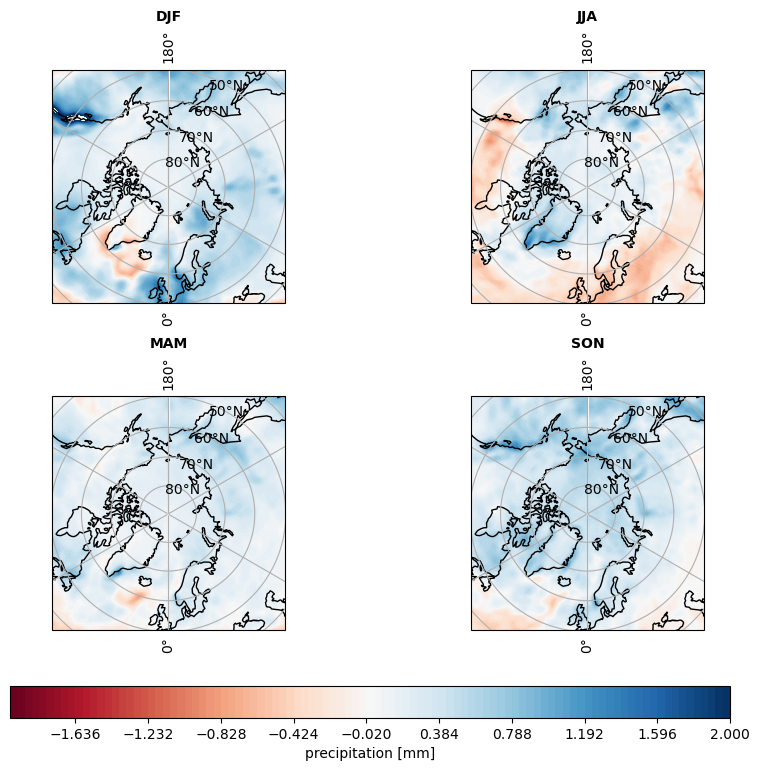

In [31]:
plot_seasons_map(season_diff, 'pr', seasons, 'precipitation [mm]', np.linspace(-2,2,100))

Figure 6: Seasonal plot for precipitation

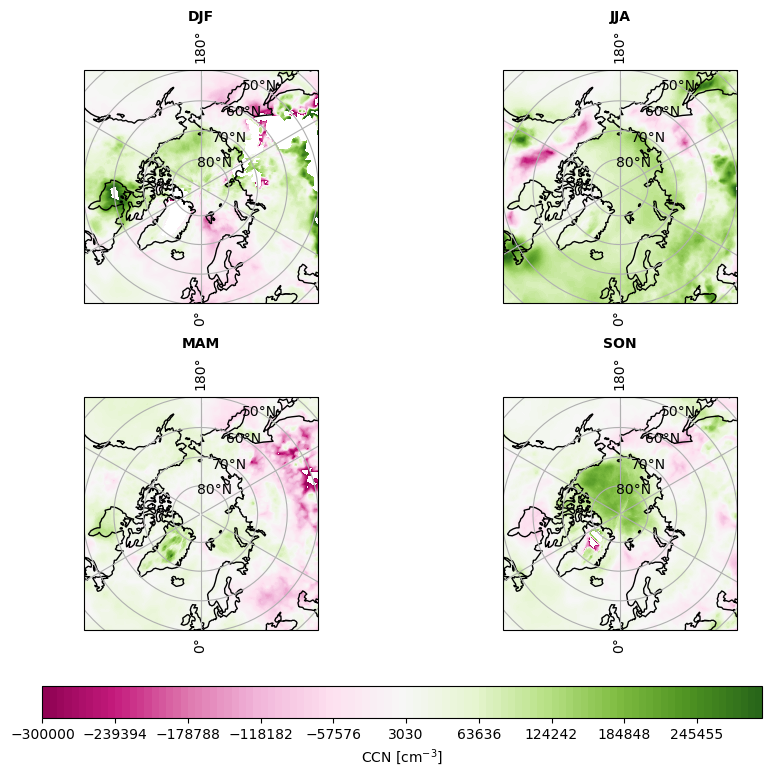

In [32]:
plot_seasons_map(season_diff, 'ccn', seasons, 'CCN [cm$^{-3}$]', np.linspace(-300000,300000,100), cmap='PiYG')

Figure 7: Seasonal plot for CCN concentrations

## 4. Conclusion <a name="conclusion"></a>

The increasing precipitation in a warmer climate is shown to have a possible influence on aerosol concentration. However, there is not a significant pattern of how increasing precipitation affects aerosol concentration. Multiple factors play an important role in the variation in aerosol concentration. These factors, such as solar radiation, are needed to be accounted for to completely understand the influence of precipitation on aerosol concentration. 

## 5. References <a name="references"></a>

Previdi, M., Smith, K.L., Lorenzo, P.M.: Arctic amplification of climate change: a review of underlying mechanism, (2021), Environ. Res. Lett. 16 093003, DOI: 10.1088/1748-9326/ac1c29


Bintanja, R., Van Der Wiel, K., Van Der Linden, E.C., Reusen, J., Bogerd, L., Krikken, F., Selten, F.M.: Strong future increases in Arctic precipitation variability linked to poleward moisture transport, (2020), SCIENCE ADVANCES, Vol 6, Issue 7, DOI: 10.1126/sciadv.aax68 

Isokääntä, S., et al.: The effect of clouds and precipitation on the aerosol concentrations and composition in a boreal forest environment, (2022), Atmos. Chem. Phys., 22, 11823–11843, DOI: https://doi.org/10.5194/acp-22-11823-2022
 

## 6. Acknowledgments <a name="Acknowledgments"></a>

I would like to express a great thanks to my group members Arrtu and Zhangcheng for their great support, and for always being available for any questions. I would also like to thank our group assistant, Theodore, for his great help with coding, and for helping me download data from esgf.

Otherwise, I would like to thank my fellow students for making the excursion extra enjoyable, and to thank Paul and Michael for organizing the eScience course. 